## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 07/IV)

In [1]:
import pandas as pd
import requests
import datetime
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
        
print('Dataset is ready.')

#Data Wrangling
df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population','x']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_domain = df_domain[df_domain['Geold'] == 'NL']
df_domain.drop('Geold',1,inplace=True)
df_domain.drop(df_domain.tail(1).index,inplace=True) # drop last row 31-12-2019
#df_domain.set_index(pd.DatetimeIndex(df_domain['dateRep']), inplace=True)
df_domain.loc[:, 'Case_Fatality_Ratio'] =df_domain['Deaths']/df_domain.Cases
df_NL=df_domain
df_NL.head(10)


Dataset is ready.


,Cases,Deaths,x,Case_Fatality_Ratio
dateRep,,,,
2020-05-02,475,98,Europe,0.206316
2020-05-01,514,84,Europe,0.163424
2020-04-30,386,145,Europe,0.375648
2020-04-29,171,48,Europe,0.280702
2020-04-28,400,43,Europe,0.107500
2020-04-27,655,66,Europe,0.100763
2020-04-26,655,120,Europe,0.183206
2020-04-25,806,112,Europe,0.138958
2020-04-24,887,123,Europe,0.138670


In [3]:
df_NL.tail(10)

,Cases,Deaths,x,Case_Fatality_Ratio
dateRep,,,,
2020-01-10,0,0,Europe,NaN
2020-01-09,0,0,Europe,NaN
2020-01-08,0,0,Europe,NaN
2020-01-07,0,0,Europe,NaN
2020-01-06,0,0,Europe,NaN
2020-01-05,0,0,Europe,NaN
2020-01-04,0,0,Europe,NaN
2020-01-03,0,0,Europe,NaN
2020-01-02,0,0,Europe,NaN


In [4]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df_NL.shape

(123, 4)

In [6]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2020-05-02 to 2020-01-01
Data columns (total 4 columns):
Cases                  123 non-null int64
Deaths                 123 non-null int64
x                      123 non-null object
Case_Fatality_Ratio    65 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [7]:
df_NL.isnull().sum()

Cases                   0
Deaths                  0
x                       0
Case_Fatality_Ratio    58
dtype: int64

In [8]:
df_NL.describe()

,Cases,Deaths,Case_Fatality_Ratio
count,123.000000,123.000000,65.000000
mean,323.504065,39.780488,0.096321
std,437.048078,59.960169,0.082519
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.025974
50%,5.000000,0.000000,0.089212
75%,718.500000,83.500000,0.138958
max,1335.000000,234.000000,0.375648


## General Trendline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F825C6080>,
      dtype=object)

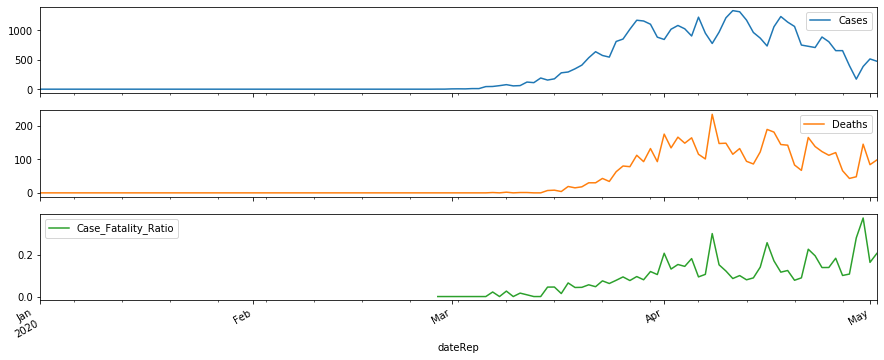

In [9]:
df_NL.plot(subplots=True, figsize=(15,6))

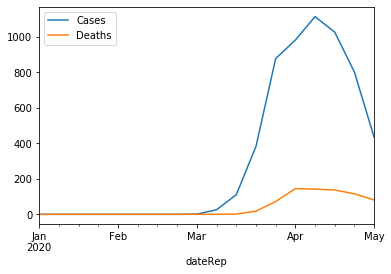

In [10]:
df_NL[['Cases','Deaths']].resample('W').mean().plot()

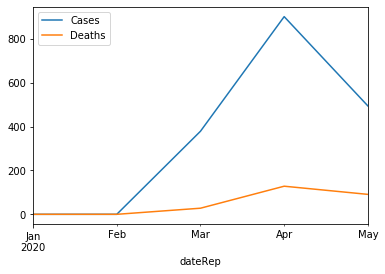

In [11]:
df_NL[['Cases','Deaths']].resample('M').mean().plot()

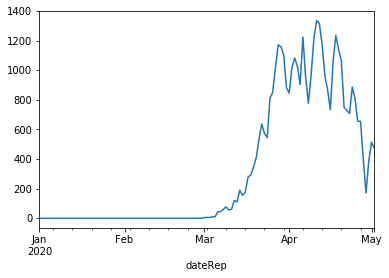

In [12]:
df_NL['Cases'].resample('D').mean().plot()

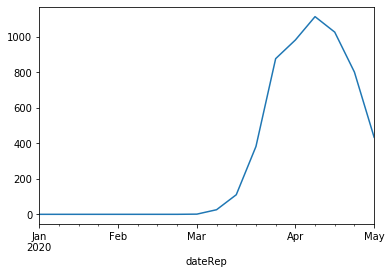

In [13]:
df_NL['Cases'].resample('W').mean().plot()

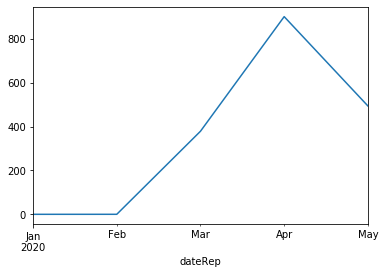

In [14]:
df_NL['Cases'].resample('M').mean().plot()

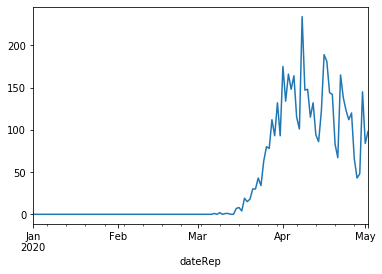

In [15]:
df_NL['Deaths'].resample('D').mean().plot()

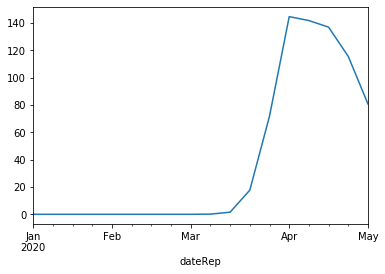

In [16]:
df_NL['Deaths'].resample('W').mean().plot()

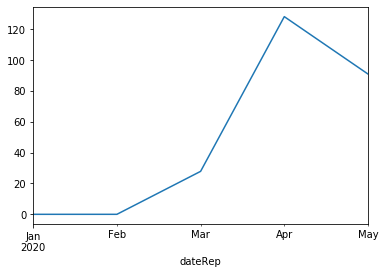

In [17]:
df_NL['Deaths'].resample('M').mean().plot()

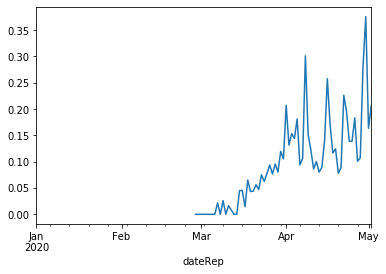

In [18]:
df_NL['Case_Fatality_Ratio'].resample('D').mean().plot()

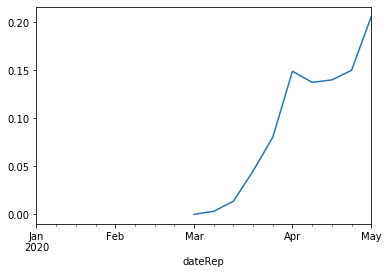

In [19]:
df_NL['Case_Fatality_Ratio'].resample('W').mean().plot()

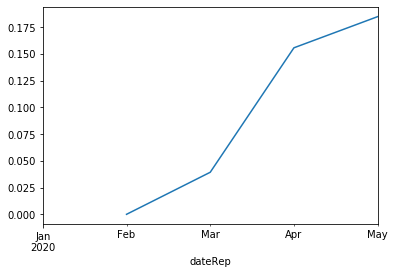

In [20]:
df_NL['Case_Fatality_Ratio'].resample('M').mean().plot()

## March Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F82B3D780>,
      dtype=object)

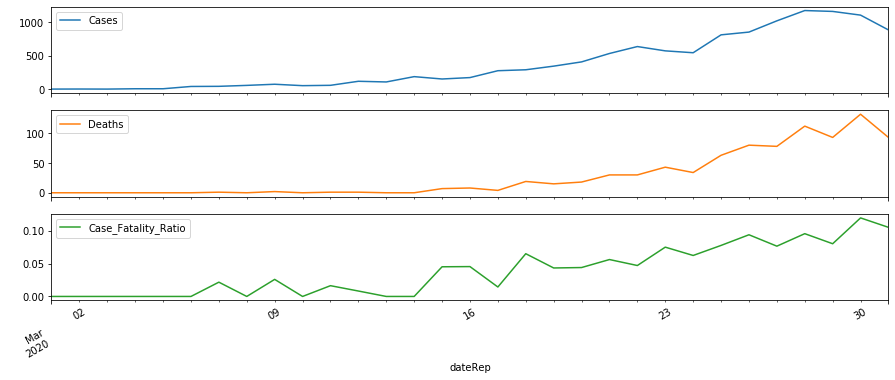

In [21]:
df_NL['2020-03'].plot(subplots=True, figsize=(15,6))

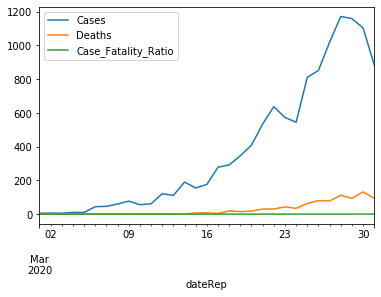

In [22]:
df_NL['2020-03'].resample('D').mean().plot()

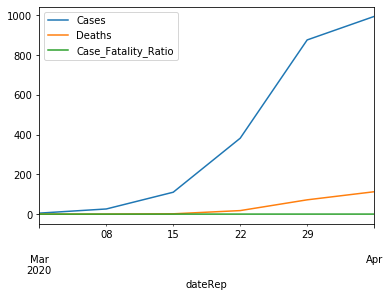

In [23]:
df_NL['2020-03'].resample('W').mean().plot()

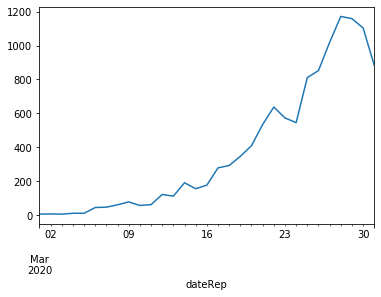

In [24]:
df_NL.Cases['2020-03'].resample('D').mean().plot()

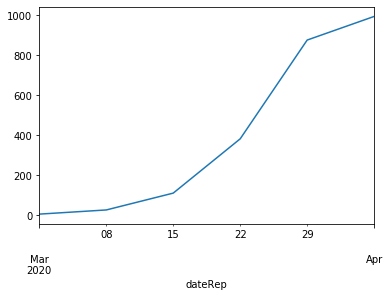

In [25]:
df_NL.Cases['2020-03'].resample('W').mean().plot()

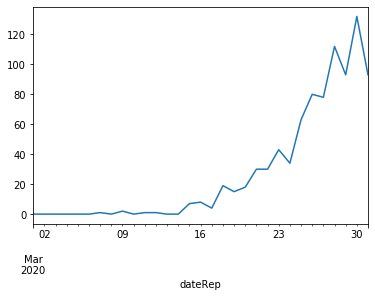

In [26]:
df_NL.Deaths['2020-03'].resample('D').mean().plot()

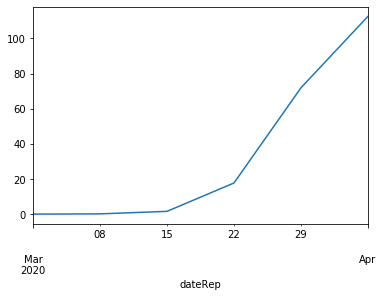

In [27]:
df_NL.Deaths['2020-03'].resample('W').mean().plot()

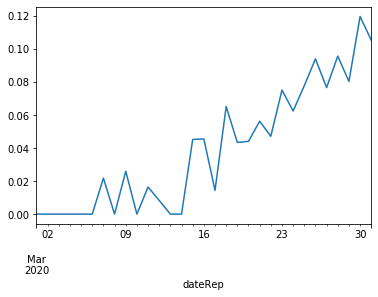

In [28]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('D').mean().plot()

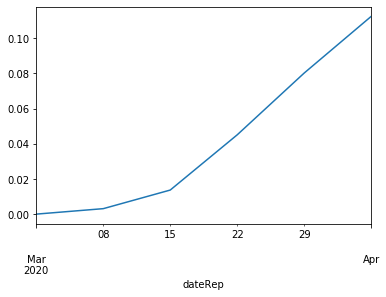

In [29]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('W').mean().plot()

## April Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F82EE0160>,
      dtype=object)

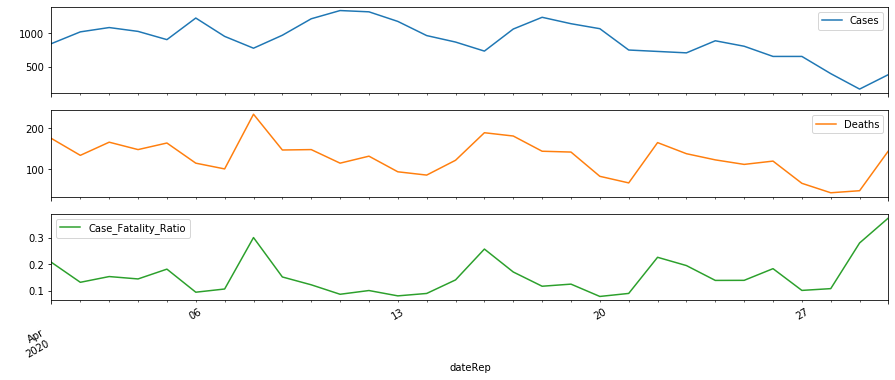

In [30]:
df_NL['2020-04'].plot(subplots=True, figsize=(15,6))

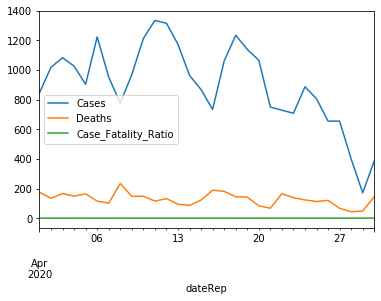

In [31]:
df_NL['2020-04'].resample('D').mean().plot()

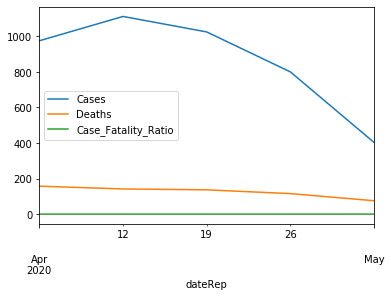

In [32]:
df_NL['2020-04'].resample('W').mean().plot()

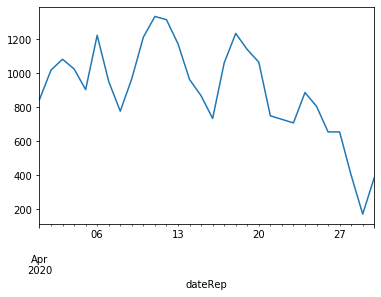

In [33]:
df_NL.Cases['2020-04'].resample('D').mean().plot()

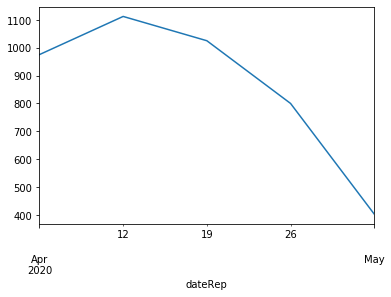

In [34]:
df_NL.Cases['2020-04'].resample('W').mean().plot()

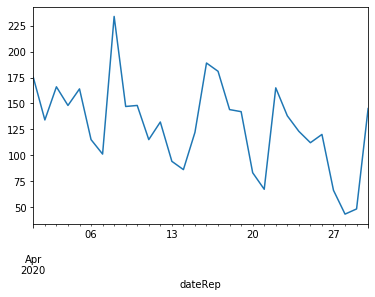

In [35]:
df_NL.Deaths['2020-04'].resample('D').mean().plot()

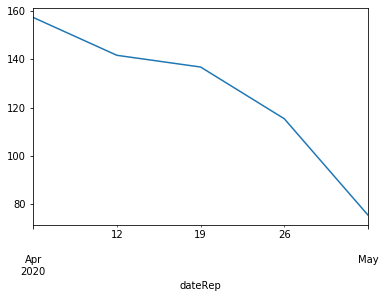

In [36]:
df_NL.Deaths['2020-04'].resample('W').mean().plot()

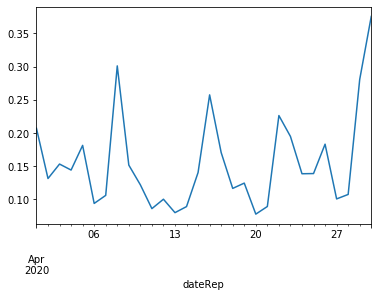

In [37]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('D').mean().plot()

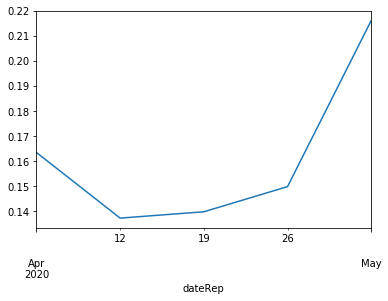

In [38]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('W').mean().plot()

## May Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F860CA7F0>,
      dtype=object)

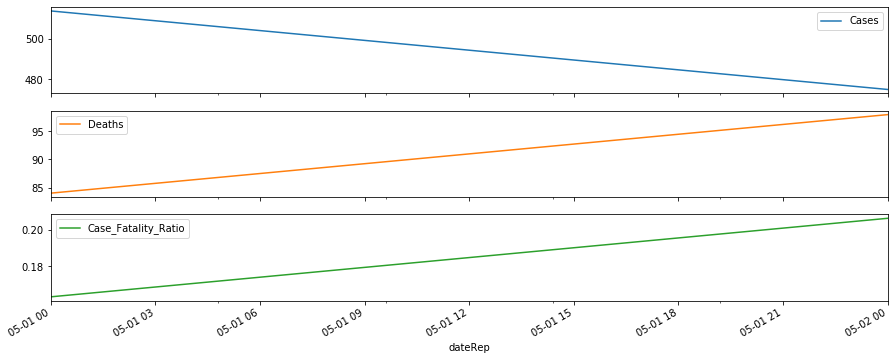

In [39]:
df_NL['2020-05'].plot(subplots=True, figsize=(15,6))

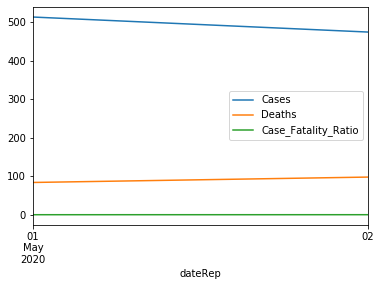

In [40]:
df_NL['2020-05'].resample('D').mean().plot()

C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2627.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


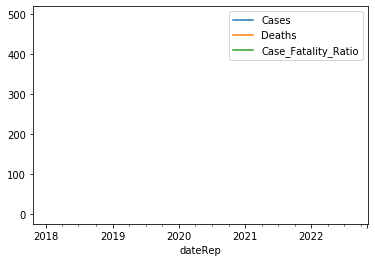

In [41]:
df_NL['2020-05'].resample('W').mean().plot()

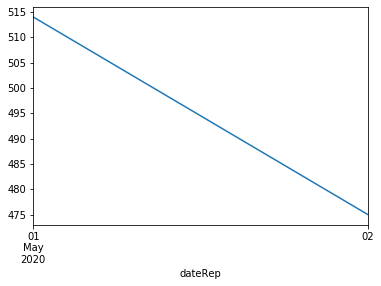

In [42]:
df_NL.Cases['2020-05'].resample('D').mean().plot()

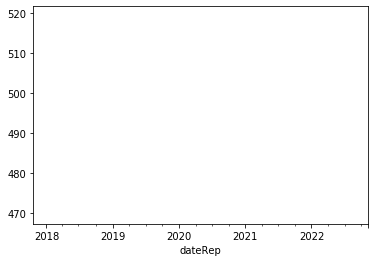

In [43]:
df_NL.Cases['2020-05'].resample('W').mean().plot()

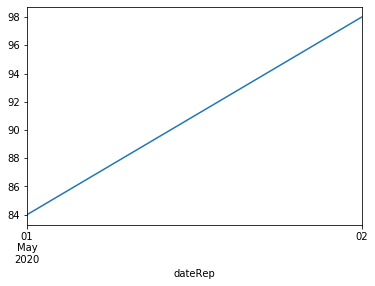

In [44]:
df_NL.Deaths['2020-05'].resample('D').mean().plot()

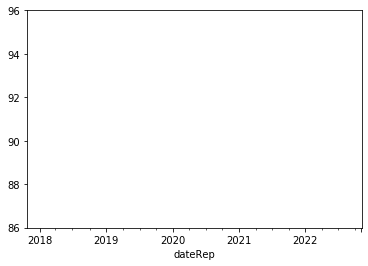

In [45]:
df_NL.Deaths['2020-05'].resample('W').mean().plot()

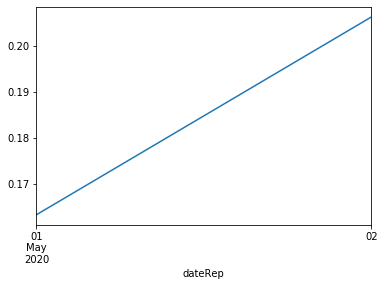

In [46]:
df_NL.Case_Fatality_Ratio['2020-05'].resample('D').mean().plot()

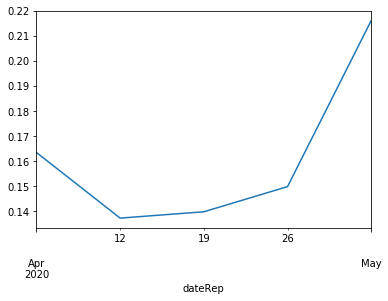

In [47]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('W').mean().plot()